# The exploding Vanishing gradient problem

Fanin = no of inputs coming in the layer
Fanout = no of neurons in that layer
## glorot --> tanh, logistic, softmax
## He initialisaiion --> Relu
## LeCUN --> SELU

In [1]:
# by default, keras uses Glorot Intialsiation, you can change it like this

import tensorflow as tf
import keras

keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")


<Dense name=dense, built=False>

In [2]:
# If you want He initialization with a uniform distribution but based on fanavg rather
# than fanin, you can use the VarianceScaling initializer like this:

he_avg_init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")

keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)


<Dense name=dense_1, built=False>

One of the insights in the 2010 paper by Glorot and Bengio was that the problems with unstable gradients were in part due to a poor choice of activation function. Until then most people had assumed that if Mother Nature had chosen to use roughly sig‐ moid activation functions in biological neurons, they must be an excellent choice. But it turns out that other activation functions behave much better in deep neural net‐ works—in particular, the ReLU activation function, mostly because it does not satu‐ rate for positive values (and because it is fast to compute).

## Dying Relu (as weighted sum becomes negative and does not change with gradient descent as slope becomes zero as well)

Unfortunately, the ReLU activation function is not perfect. It suffers from a problem known as the dying ReLUs: during training, some neurons effectively “die,” meaning they stop outputting anything other than 0. In some cases, you may find that half of your network’s neurons are dead, especially if you used a large learning rate. A neu‐ ron dies when its weights get tweaked in such a way that the weighted sum of its inputs are negative for all instances in the training set. When this happens, it just keeps outputting zeros, and Gradient Descent does not affect it anymore because the gradient of the ReLU function is zero when its input is negative

To solve this problem, you may want to use a variant of the ReLU function, such as the leaky ReLU. This function is defined as LeakyReLUα(z) = max(αz, z) (see Figure 11-2). The hyperparameter α defines how much the function “leaks”: it is the slope of the function for z < 0 and is typically set to 0.01. This small slope ensures that leaky ReLUs never die; they can go into a long coma, but they have a chance to even‐ tually wake up

1. Leaky relu
2. Randomized leaky relu (RRelu)
3. Parametric leaky relu (PRelu)

# exponential linear unit (ELU) # new activation function

## MUCH BETTER PERFORMANCE THAN RELUU

The main drawback of the ELU activation function is that it is slower to compute than the ReLU function and its variants (due to the use of the exponential function). Its faster convergence rate during training compensates for that slow computation, but still, at test time an ELU network will be slower than a ReLU network

Then, a 2017 paper7 by Günter Klambauer et al. introduced the Scaled ELU (SELU) activation function: as its name suggests, it is a scaled variant of the ELU activation function. The authors showed that if you build a neural network composed exclu‐ sively of a stack of dense layers, and if all hidden layers use the SELU activation func‐ tion, then the network will self-normalize: the output of each layer will tend to preserve a mean of 0 and standard deviation of 1 during training, which solves the vanishing/exploding gradients problem. As a result, the SELU activation function often significantly outperforms other activation functions for such neural nets (espe‐ cially deep ones). There are, however, a few conditions for self-normalization to hap‐ pen (see the paper for the mathematical justification):
• The input features must be standardized (mean 0 and standard deviation 1).
• Every hidden layer’s weights must be initialized with LeCun normal initialization.
In Keras, this means setting kernel_initializer="lecun_normal".
• The network’s architecture must be sequential. Unfortunately, if you try to use SELU in nonsequential architectures, such as recurrent networks (see Chap‐ ter 15) or networks with skip connections (i.e., connections that skip layers, such as in Wide & Deep nets), self-normalization will not be guaranteed, so SELU will not necessarily outperform other activation functions.

### whcih actiocation functiont theh ?
So, which activation function should you use for the hidden layers of your deep neural networks? Although your mileage will vary, in general SELU > ELU > leaky ReLU (and its variants) > ReLU > tanh > logistic. If the network’s architecture prevents it from self- normalizing, then ELU may perform better than SELU (since SELU is not smooth at z = 0). If you care a lot about runtime latency, then you may prefer leaky ReLU. If you don’t want to tweak yet another hyperparameter, you may use the default α values used by Keras (e.g., 0.3 for leaky ReLU). If you have spare time and computing power, you can use cross-validation to evaluate other activation functions, such as RReLU if your network is overfitting or PReLU if you have a huge training set. That said, because ReLU is the most used activation function (by far), many libraries and hardware accelerators provide ReLU-specific optimizations; therefore, if speed is your priority, ReLU might still be the best choice.

In [4]:
# To use the leaky ReLU activation function, create a LeakyReLU layer and add it to your model just after the layer you want to apply it to:
model = keras.models.Sequential([
    keras.layers.Dense(10, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2) # adds leaky relu to above layer

])

/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [8]:
# apply PRELU activation
# To use the leaky ReLU activation function, create a LeakyReLU layer and add it to your model just after the layer you want to apply it to:
model = keras.models.Sequential([
    keras.layers.Dense(10, kernel_initializer="he_normal"),
    keras.layers.PReLU() # adds leaky relu to above layer

])



# selu activation 
layer = keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

## No need to use StandardScaler, use batch normalization layer instead

f you add a BN layer as the very first layer of your neural network, you do not need to standardize your train‐ ing set (e.g., using a StandardScaler); the BN layer will do it for you (well, approxi‐ mately, since it only looks at one batch at a time, and it can also rescale and shift each input feature)

In [ ]:
#### Batch normalisation

# appling Batch normalization in keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax") # output layer does not require batch normalization

])

/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary() # BN layer adds four parameters per input

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [12]:
### Gradient clipppping

## clips all gradient between a certain limit

optimizer = keras.optimizers.SGD(clipvalue=1) # clips gradient from -1 to 1.. this is to preecnt exploding gradient problem
model.compile(optimizer=optimizer, loss="mse") 

In [13]:
## tip: use clipnorm, instead of clipvalue, to retain orientation

### but this may result in a very small value if the gradient vector has small value in one dirn and one value in another, 
## so, you can use a combination of both


In [ ]:
bn_layer = model.layers[1] # batch normalisation layer


[]

In [25]:
### reusing pretrained layers

# using layers of "model" on a new model

model_layers_without_output_layer = model.layers[:-1]
new_model = keras.models.Sequential(model_layers_without_output_layer)
new_model.add(keras.layers.Dense(1, activation="sigmoid")) # output layer for out new model

Note that model_A and model_B_on_A now share some layers. When you train model_B_on_A, it will also affect model_A. If you want to avoid that, you need to clone model_A before you reuse its layers. To do this, you clone model A’s architecture with clone_model(), then copy its weights (since clone_model() does not clone the weights):

In [31]:
new_model_clone = keras.models.clone_model(new_model)
new_model_clone.set_weights(new_model.get_weights()) # now you can train the new model clone without altering the original model layers parameteres

In [32]:
## making reused layers untrainable

for layer in new_model_clone.layers:
    layer.trainable= False

# compile model whenever you change its layers settings (like if any of them is trainable or not trainable etc)
new_model_clone.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])


so,
1. we first trained the model with reused layers, with setting all reused layers as untrainable.. this way the output layer weights of the new_model_clone will adjust themselves with the reused layers... lets say for 4 epochs

2. then we set all layers as trainable, nowww we train the rest of the epochs on the it (of course after compiling it.. )

3. bonus: also reduce the learning rate so we do not completely ruin the reused layers weights

# AND BOOM, WE GET A GREAT FUcKING ACCURACY!

In [ ]:
# history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
#                                validation_data=(X_valid_B, y_valid_B)) 
# for layer in model_B_on_A.layers[:-1]: 
#         layer.trainable = True 
# optimizer = keras.optimizers.SGD(lr=1e-4) # the default lr is 1e-2 model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
#                          metrics=["accuracy"])
#     history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
#                                validation_data=(X_valid_B, y_valid_B))

## optimizers i have completed and made a notes of them when to use what optimizer

In [36]:
# implementing Momenturm with SGD

optimizer = keras.optimizers.SGD(momentum=0.9, learning_rate=0.001) # putting beta as 0.9 in momentum with SGD optimizer



In [37]:
# implemeting NAG (Nestreov accelareated gradient)

# NAG is generally faster than regular momentum optimization. To use it, simply set nesterov=True when creating the SGD optimizer:

optimizer = keras.optimizers.SGD(momentum=0.9, learning_rate=0.001, nesterov=True) # NAG implemented
 

In [38]:
# implementing ADAGRAD (for scarce datasets) # dynamic learning rate

## Keras has an Adagrad optimizer, you should not use it to train deep neu‐ ral networks (it may be efficient for simpler tasks such as Linear Regression, though).

optimizer = keras.optimizers.Adagrad(learning_rate=0.001) # no hyperparameters to tune





In [39]:
## RMS PROP (BEST LOVELY) for scarce datasets (ADAGRAD KE CONECEPTS KE UPAR BUILT HEI.. DEAL WITH THE VANISHING LEARNING RATE PROBLEM)
# it does so by using exponential decay


optimizer = keras.optimizers.RMSprop(rho=0.9) # rho is beta here # jitni badi rho(beta) ki value, utna hi kam importance to purani values(gradients)



In [ ]:
# ADAM OPTIMIZER (LOVELY BEST BEST BESTT!!!!! IMPLEMENTING EXPOENETIAL DECAY LEARNING RATE AND MOMMENTUM IN A SINGLE OPTIMIZER)

adam_opti = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# beta1 is for momentum
# beta2 is for decaing gradients


# Nadam is basically adam with Nestorov trick

# learning rate scheduling 


In [43]:
# power scheduling in keras

optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)


/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [44]:
# exponentail decay
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s) # every "s" epoch, the learning rate gets 1/10
    return exponential_decay_fn


exp_decay_fn = exponential_decay(0.01, 20)
    

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exp_decay_fn)

history = model.fit([...], callbacks=[lr_scheduler])

In [ ]:
## you can use this type of learning rate scheduler also

def piecewise_constant_fn(epoch): 
    if epoch < 5:
        return 0.01 
    elif epoch < 15: 
        return 0.005
    else:
        return 0.001


# now create lr scheduler

lr_Sched = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
history = model.fit([...], callbacks=[lr_Sched])



In [48]:
# it will multiply the learning rate by 0.5 whenever the best validation loss does not improve for five consecutive epochs

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5) # 5 epochs

In [ ]:
# you can use l2 regularization to constrain a neural network’s connection weights, and/or l1 regularization if you want a sparse model (with many weights equal to 0). Here is how to apply l2 regulari‐ zation to a Keras layer’s connection weights, using a regularization factor of 0.01:



# DROP OUT EXAMPLE

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


In [69]:
# binary classification
X = np.array([
        [-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

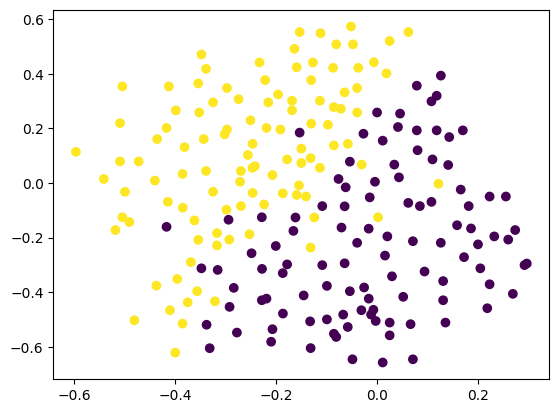

In [70]:
# plotting one feature of X vs another feature of X and showing the "y" as color
plt.scatter(X[:, 0], X[:, 1], c=y) # tere lie ahahahaah



/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


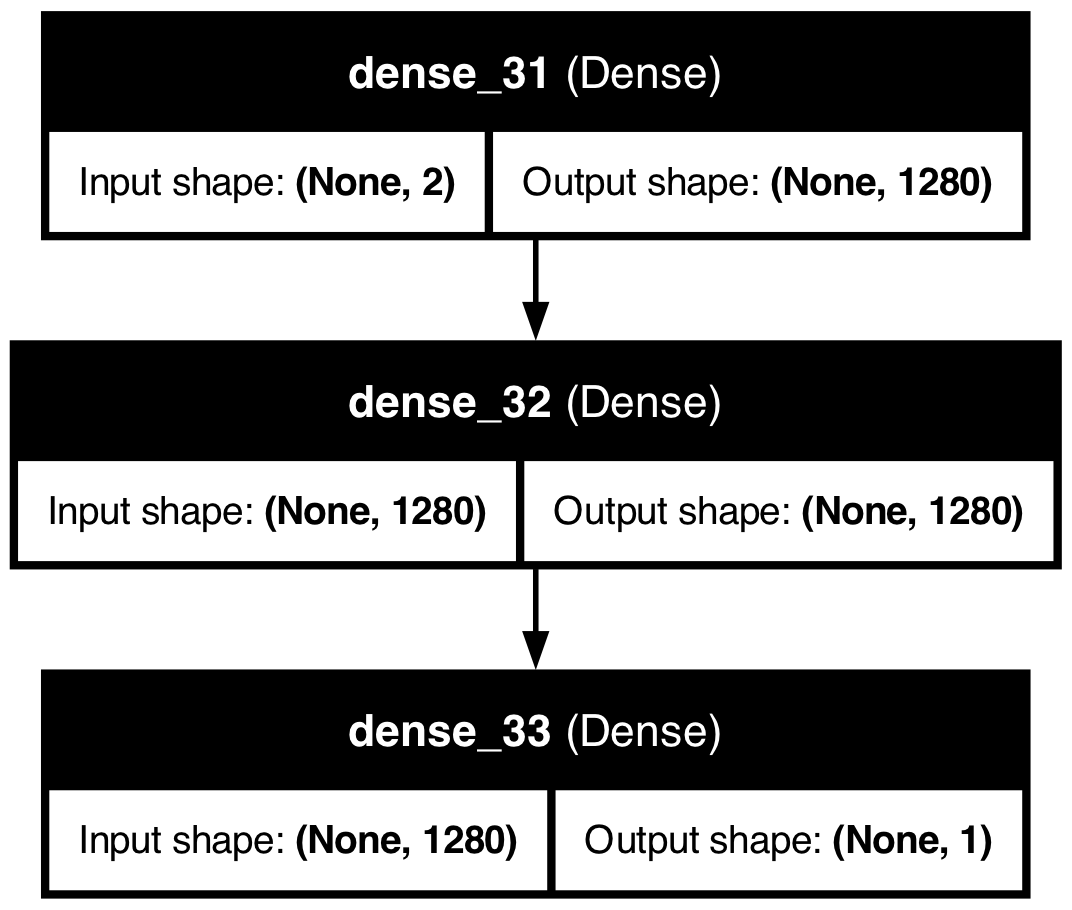

In [100]:
import keras
from keras.utils import plot_model

model = keras.models.Sequential()
model.add(keras.layers.Dense(1280, activation="relu", input_dim=2))
model.add(keras.layers.Dense(1280, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid")) #output layer (sigmoid for classification)


plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [101]:
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["accuracy"])


In [106]:
history = model.fit(X, y, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9369 - loss: 0.1855 - val_accuracy: 0.8605 - val_loss: 0.4331
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9428 - loss: 0.1672 - val_accuracy: 0.8605 - val_loss: 0.4550
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9555 - loss: 0.1620 - val_accuracy: 0.8605 - val_loss: 0.4235
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9540 - loss: 0.1529 - val_accuracy: 0.8605 - val_loss: 0.4489
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9235 - loss: 0.2145 - val_accuracy: 0.9070 - val_loss: 0.3756
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9322 - loss: 0.2096 - val_accuracy: 0.8605 - val_loss: 0.4966
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8952 - loss: 0.2011 - val_accuracy: 0.8605 - val_loss: 0.3747
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9325 - loss: 0.1859 - val_accuracy: 0.8605 - v

accuracy is close to 100% on training dataset
but validation dataset accuracy is close to 80%.. clear case of overfitting

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step


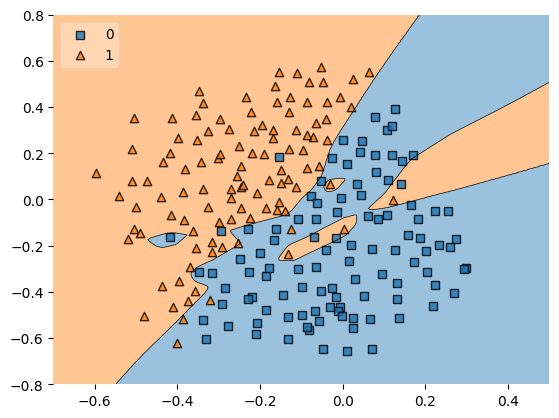

In [107]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype("int"), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

Behenker overfitttting!!!

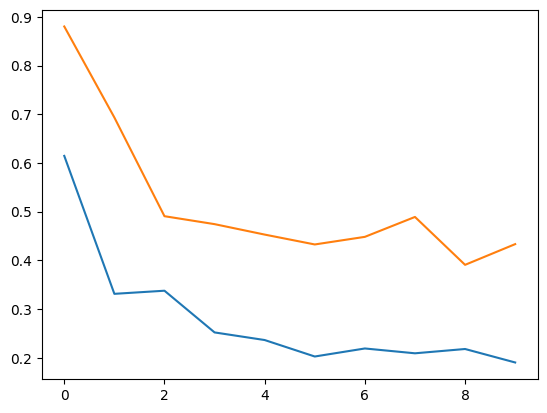

In [104]:
plt.plot(history.history['loss']) #blue
plt.plot(history.history['val_loss']) #orange

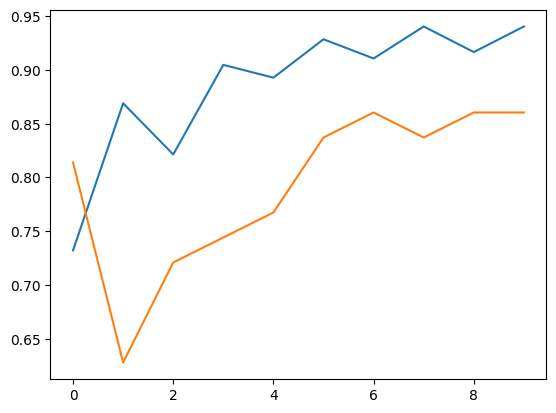

In [105]:
plt.plot(history.history['accuracy']) # blue
plt.plot(history.history['val_accuracy']) #orange

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(128, input_dim=2, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
])


adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["accuracy"])

/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6986 - loss: 0.6204 - val_accuracy: 0.6047 - val_loss: 0.6020
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8720 - loss: 0.3283 - val_accuracy: 0.5814 - val_loss: 0.8099
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8540 - loss: 0.3218 - val_accuracy: 0.7209 - val_loss: 0.6281
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8980 - loss: 0.2667 - val_accuracy: 0.8605 - val_loss: 0.3658
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8988 - loss: 0.2789 - val_accuracy: 0.8605 - val_loss: 0.3651
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9101 - loss: 0.2330 - val_accuracy: 0.8140 - val_loss: 0.3918
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9140 - loss: 0.2152 - val_accuracy: 0.8605 - val_loss: 0.3843
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8864 - loss: 0.2806 - val_accuracy: 0.8372 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 458us/step


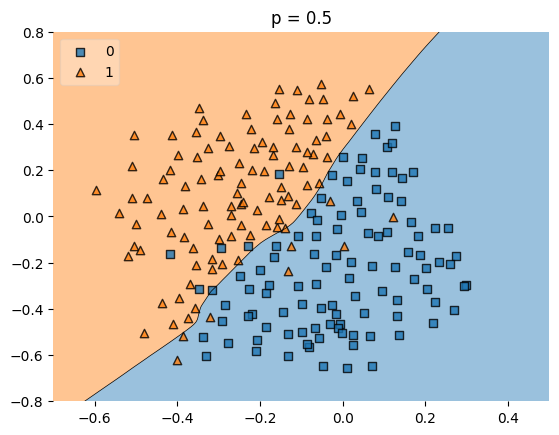

In [91]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

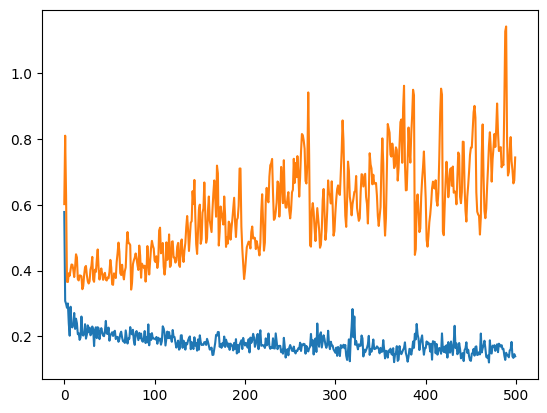

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

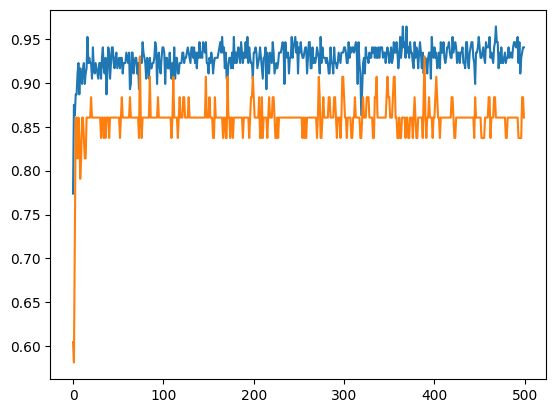

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Regression Problem

In [108]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

In [109]:
# let's generate data


# numpy linspace

# Return evenly spaced numbers over a specified interval.

# Returns num evenly spaced samples, calculated over the interval [start, stop].

# The endpoint of the interval can optionally be excluded.
X_train = np.linspace(-1, 1, 20) # give me 20 datapoints between -1 and 1
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

X_test = np.linspace(-1, 1, 20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])


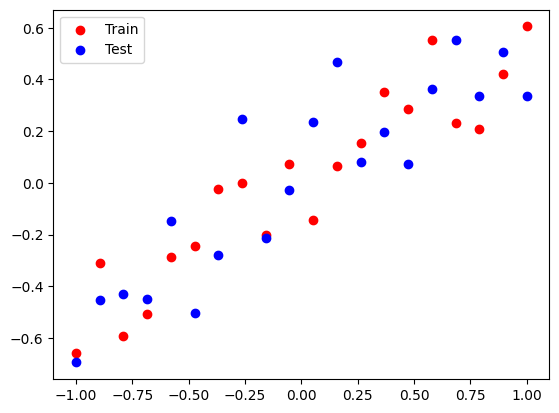

In [112]:
plt.scatter(X_train, y_train, c="red", label="Train")
plt.scatter(X_test, y_test, c="blue", label="Test")
plt.legend()
plt.show()


## Regression Model

In [114]:
model_1 = keras.models.Sequential([
    keras.layers.Dense(128, activation="relu", input_dim=1),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="linear")
])

adam = keras.optimizers.Adam(learning_rate=0.01)
model_1.compile(optimizer=adam, loss="mse", metrics=["mse"]) # mse loss for regression
history = model_1.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test), verbose=True)


Epoch 1/500


/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - loss: 0.1233 - mse: 0.1233 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0165 - mse: 0.0165 - va

In [115]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004660567734390497, Test: 0.046879105269908905


10 times more loss in Test Dataset.. clear case of overfitting

In [116]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


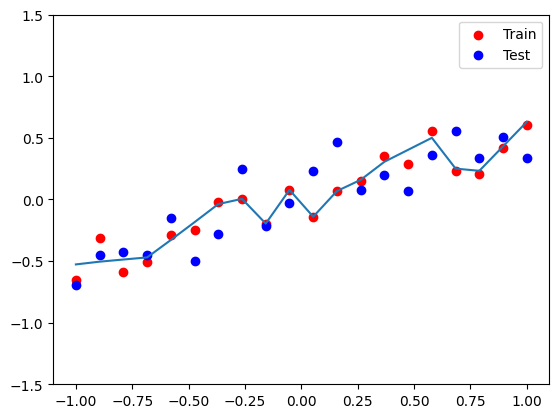

In [117]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

## DROPOUT MODEL

In [128]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Dense(128, input_dim=1, activation="relu"))
model_2.add(keras.layers.Dropout(0.2))
model_2.add(keras.layers.Dense(128, activation="relu"))
model_2.add(keras.layers.Dropout(0.2))
model_2.add(keras.layers.Dense(1, activation="linear"))
adam = keras.optimizers.Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [127]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.010252712294459343, Test: 0.040374722331762314


now test error is only 3 times the train error

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


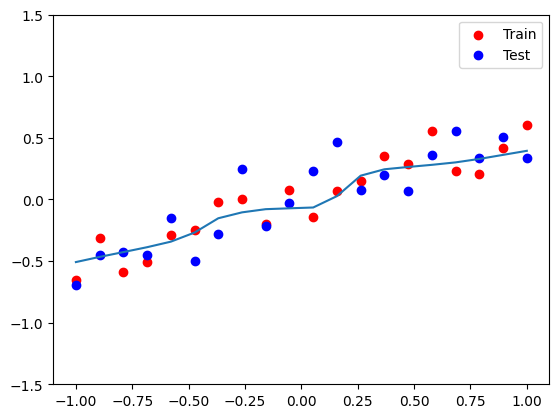

In [123]:
y_pred_2 = model_2.predict(X_test)
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

How to apply l1 and l2 regularisation??

just apply to each layer like this

In [129]:
keras.layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l1(0.03))
keras.layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l1(0.06))


<Dense name=dense_56, built=False>

All examples of Weight initialization techniques

In [131]:
keras.layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.glorot_normal())
keras.layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.glorot_uniform())
keras.layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.he_normal())
keras.layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.he_uniform())


<Dense name=dense_64, built=False>